In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv


In [18]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

In [19]:
df = pd.read_csv('/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv')


In [20]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


**Data exploration, data cleaning, and model preparation**

In [21]:
df.dtypes


Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

In [22]:
df.isnull().sum()


Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [23]:
df.shape


(1500, 11)

In [24]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.148667,9.252728,20.000000,27.000000,35.000000,43.000000,50.000000
Gender,1500.0,0.492000,0.500103,0.000000,0.000000,0.000000,1.000000,1.000000
EducationLevel,1500.0,2.188000,0.862449,1.000000,2.000000,2.000000,3.000000,4.000000
ExperienceYears,1500.0,7.694000,4.641414,0.000000,4.000000,8.000000,12.000000,15.000000
PreviousCompanies,1500.0,3.002000,1.410670,1.000000,2.000000,3.000000,4.000000,5.000000
DistanceFromCompany,1500.0,25.505379,14.567151,1.031376,12.838851,25.502239,37.737996,50.992462
InterviewScore,1500.0,50.564000,28.626215,0.000000,25.000000,52.000000,75.000000,100.000000
SkillScore,1500.0,51.116000,29.353563,0.000000,25.750000,53.000000,76.000000,100.000000
PersonalityScore,1500.0,49.387333,29.353201,0.000000,23.000000,49.000000,76.000000,100.000000
RecruitmentStrategy,1500.0,1.893333,0.689642,1.000000,1.000000,2.000000,2.000000,3.000000


In [25]:
df['HiringDecision'].value_counts(normalize = True ,dropna = False)


HiringDecision
0    0.69
1    0.31
Name: proportion, dtype: float64

**Create the training and testing data**

In [26]:
y = df["HiringDecision"]


In [27]:
X = df.copy()
X = X.drop("HiringDecision", axis = 1)

In [28]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**"Instantiate" your XGBClassifer**

In [29]:
# Define xgb to be your XGBClassifier.


xgb = XGBClassifier(objective='binary:logistic', random_state=0)

**Define the parameters for hyperparameter tuning**

In [30]:
# Define parameters for tuning as `cv_params`.



cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

**Define how the models will be evaluated¶**

In [31]:
# Define your criteria as `scoring`.


scoring = {'accuracy', 'precision', 'recall', 'f1'}

**Construct the GridSearch cross-validation**

In [32]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

**Fit the GridSearch model to your training data**

In [33]:
%%time
# fit the GridSearch model to training data

### YOUR CODE HERE

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 16.5 s, sys: 181 ms, total: 16.7 s
Wall time: 5.32 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

**Formulate predictions on your test set**

In [34]:
# Apply your model to predict on your test data. Call this output "y_pred".


y_pred = xgb_cv.predict(X_test)

In [35]:
# 1. Print your accuracy score.

ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9173333333333333
precision score: 0.8962264150943396
recall score: 0.8260869565217391
f1 score: 0.8597285067873303


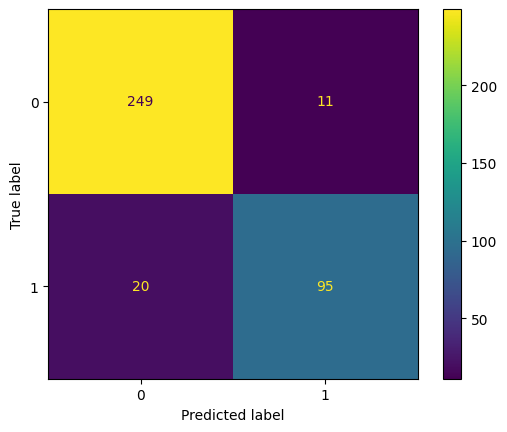

In [36]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.


cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.


disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.


disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

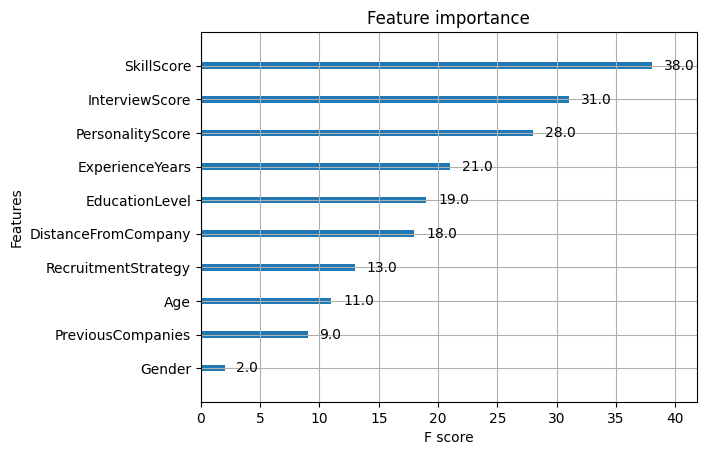

In [37]:
# Plot the relative feature importance of the predictor variables in your model.



plot_importance(xgb_cv.best_estimator_)